# Data Collection & EDA

**Imports:**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read in the training data
train = pd.read_csv('../data/train.csv')

In [3]:
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [4]:
train.shape

(2051, 81)

**2051 rows of data and 81 columns... many different features to explore!**

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

In [6]:
train.isna().sum()

Id                0
PID               0
MS SubClass       0
MS Zoning         0
Lot Frontage    330
               ... 
Misc Val          0
Mo Sold           0
Yr Sold           0
Sale Type         0
SalePrice         0
Length: 81, dtype: int64

In [7]:
train['Lot Frontage'].isnull().sum()

330

**330 housing units with no listed linear feet of street connected to property**

> Replace missings with np.NaN as type float

In [8]:
train['Alley'].isnull().sum()

1911

**1911 housing units with no alley access**

> No replacement needed

In [9]:
train['Mas Vnr Type'].isna().sum()

22

**22 housing units with no masonry**

> Replace with NA

In [10]:
train['Mas Vnr Area'].isna().sum()

22

**With no masonry there is no area**

> Replace with npNaN as type float

In [11]:
train['Bsmt Qual'].isna().sum()

55

**55 housing units with no basement**

> Replace with NaN

In [12]:
train['Bsmt Cond'].isna().sum()

55

**55 housing units with no basement condition listed**

> Replace with NaN

In [13]:
train['Bsmt Exposure'].isna().sum()

58

**58 housing units with no walkout or garden level basement walls**

> Replace with NaN

In [14]:
train['BsmtFin Type 1'].isna().sum()

55

**55 housing units with no basements listed**

> Replace with NaN

In [15]:
train['BsmtFin SF 1'].isna().sum()

1

**1 housing units with missing sq footage for a type 1 basement**

> Replace with NaN as type float

In [16]:
train['BsmtFin Type 2'].isna().sum()

56

**56 housing units with no basement type 2**

>Replace with NaN

In [17]:
train['BsmtFin SF 2'].isna().sum()

1

**1 housing units with missing sq footage for a type 2 basement**

>Replace with Nan as type float

In [18]:
train['Bsmt Unf SF'].isna().sum()

1

>Replace with Nan as type float

In [19]:
train['Total Bsmt SF'].isna().sum()

1

>Replace with Nan as type float

In [20]:
train['Bsmt Full Bath'].isna().sum()

2

>Replace with Nan as type float

In [21]:
train['Bsmt Half Bath'].isna().sum()

2

>Replace with Nan as type float

In [22]:
train['Fireplace Qu'].isna().sum()

1000

**1000 housing units with no fireplace**

> No replacement needed

In [23]:
train['Garage Type'].isna().sum()

113

**113 housing units with no garage**

> No replacement needed

In [24]:
train['Garage Yr Blt'].isna().sum()

114

> Replace with NaN as type float

In [25]:
train['Garage Finish'].isna().sum()

114

> Replace with Nan

In [26]:
train['Garage Cars'].isna().sum()

1

> Replace wity Nan as type float

In [27]:
train['Garage Area'].isna().sum()

1

> Replace with NaN as type float

In [28]:
train['Garage Qual'].isna().sum()

114

>Replace with NaN

In [29]:
train['Garage Cond'].isna().sum()

114

> Replace with NaN

In [30]:
train['Pool QC'].isna().sum()

2042

**2042 housing units with no pool**

> No replacement needed

In [31]:
train['Fence'].isna().sum()

1651

**1651 housing units with no fence**

> No replacement needed

In [32]:
train['Misc Feature'].isna().sum()

1986

**1986 housing units with no miscellaneous feature not covered in other categories**

> No replacement needed

In [33]:
train.dtypes

Id                int64
PID               int64
MS SubClass       int64
MS Zoning        object
Lot Frontage    float64
                 ...   
Misc Val          int64
Mo Sold           int64
Yr Sold           int64
Sale Type        object
SalePrice         int64
Length: 81, dtype: object

In [34]:
train.describe()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2051.000000,2.051000e+03,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,...,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,...,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,1.886918e+08,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,...,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,5.284581e+08,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,5.354532e+08,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,9.071801e+08,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


In [35]:
train.corr(numeric_only= True)

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
Id,1.000000,0.175793,0.026543,-0.024967,0.032872,-0.061483,-0.026096,-0.064444,-0.090040,-0.035493,...,-0.009045,0.001382,0.033747,-0.022791,0.009758,0.055696,-0.012683,0.127723,-0.975747,-0.051398
PID,0.175793,1.000000,-0.003632,-0.091291,0.024135,-0.265863,0.106861,-0.347039,-0.176666,-0.247959,...,-0.041221,-0.081129,0.150179,-0.024679,-0.042030,0.005825,0.004223,-0.032735,0.008476,-0.255052
MS SubClass,0.026543,-0.003632,1.000000,-0.389790,-0.245484,0.035763,-0.070141,0.035983,0.044836,-0.004047,...,0.001622,-0.020289,-0.039842,-0.030088,-0.038819,-0.004585,-0.027485,0.013027,-0.032870,-0.087335
Lot Frontage,-0.024967,-0.091291,-0.389790,1.000000,0.574024,0.194808,-0.054455,0.109504,0.085052,0.218218,...,0.115180,0.184958,-0.003302,0.031855,0.074819,0.156575,0.051676,-0.017389,0.009112,0.341842
Lot Area,0.032872,0.024135,-0.245484,0.574024,1.000000,0.105824,-0.019185,0.036002,0.050771,0.169379,...,0.155623,0.140864,0.014139,0.019553,0.067714,0.115102,0.093922,0.003197,-0.029454,0.296566
Overall Qual,-0.061483,-0.265863,0.035763,0.194808,0.105824,1.000000,-0.082770,0.602964,0.584654,0.438685,...,0.257081,0.308855,-0.154554,0.031938,0.048752,0.006558,0.022099,0.019242,-0.011578,0.800207
Overall Cond,-0.026096,0.106861,-0.070141,-0.054455,-0.019185,-0.082770,1.000000,-0.370988,0.042614,-0.135878,...,0.011034,-0.052266,0.108320,0.026907,0.047359,-0.005806,0.014269,-0.003144,0.047664,-0.097019
Year Built,-0.064444,-0.347039,0.035983,0.109504,0.036002,0.602964,-0.370988,1.000000,0.629116,0.329741,...,0.216339,0.207798,-0.380082,0.016104,-0.037866,0.003728,0.000626,-0.007083,-0.003559,0.571849
Year Remod/Add,-0.090040,-0.176666,0.044836,0.085052,0.050771,0.584654,0.042614,0.629116,1.000000,0.211443,...,0.216271,0.264476,-0.237523,0.040416,-0.041211,-0.022382,-0.001704,0.011568,0.042744,0.550370
Mas Vnr Area,-0.035493,-0.247959,-0.004047,0.218218,0.169379,0.438685,-0.135878,0.329741,0.211443,1.000000,...,0.163584,0.163489,-0.107104,0.011161,0.086631,0.012422,0.079219,-0.001472,-0.018719,0.512230


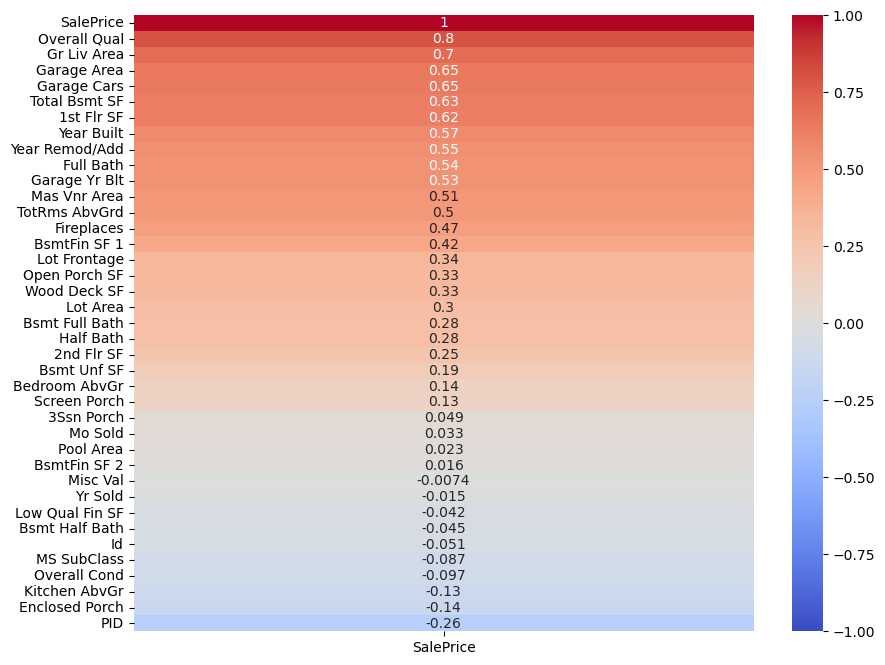

In [36]:
plt.figure(figsize=(10,8))
sns.heatmap(train.corr(numeric_only= True)[['SalePrice']].sort_values(by='SalePrice', ascending=False), 
            annot=True,
           vmin=-1,
           vmax=1,
           cmap = 'coolwarm');

plt.savefig('numeric_heatmap.png')

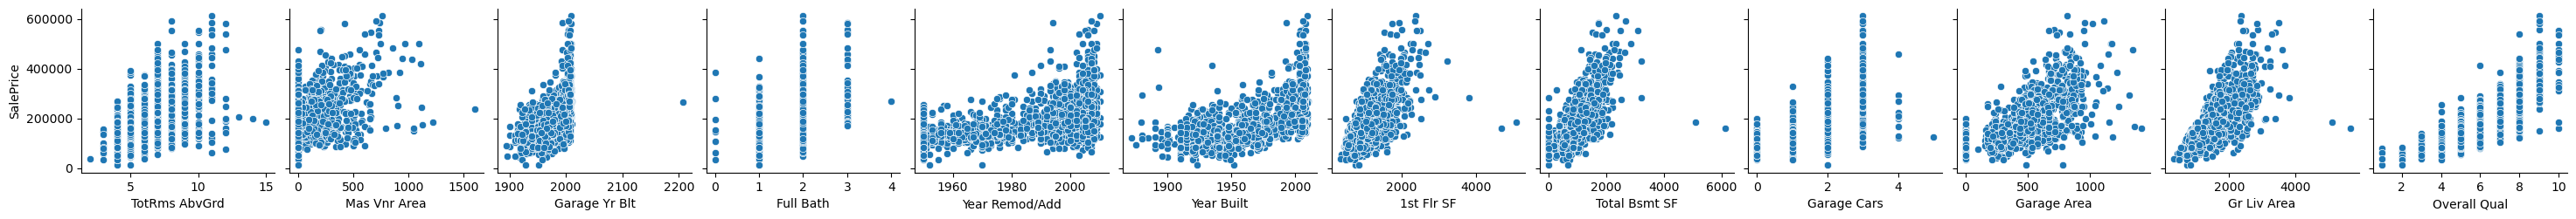

In [37]:
sns.pairplot(train, x_vars=['TotRms AbvGrd', 'Mas Vnr Area', 'Garage Yr Blt', 'Full Bath', 'Year Remod/Add', 'Year Built', '1st Flr SF', 'Total Bsmt SF', 'Garage Cars', 'Garage Area', 'Gr Liv Area', 'Overall Qual'], y_vars=['SalePrice']);

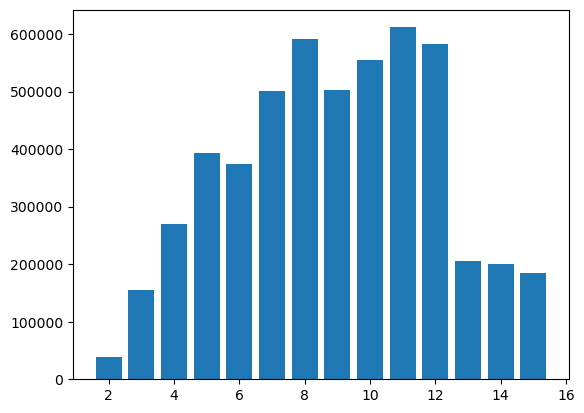

In [38]:
plt.bar(train['TotRms AbvGrd'], train['SalePrice']);

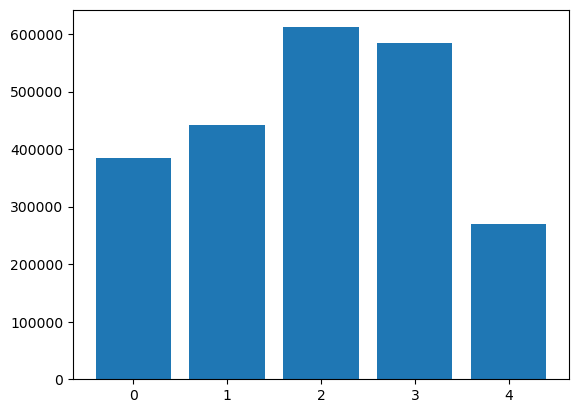

In [39]:
plt.bar(train['Full Bath'], train['SalePrice']);

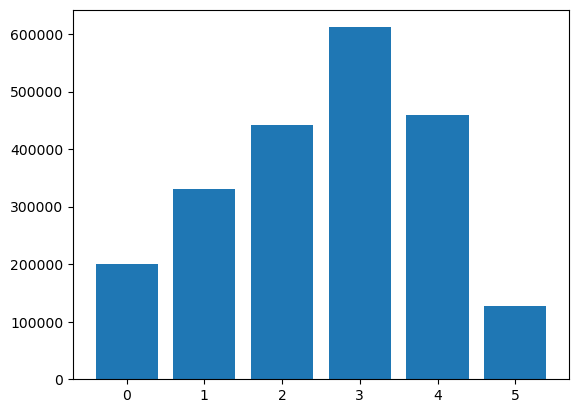

In [40]:
plt.bar(train['Garage Cars'], train['SalePrice']);

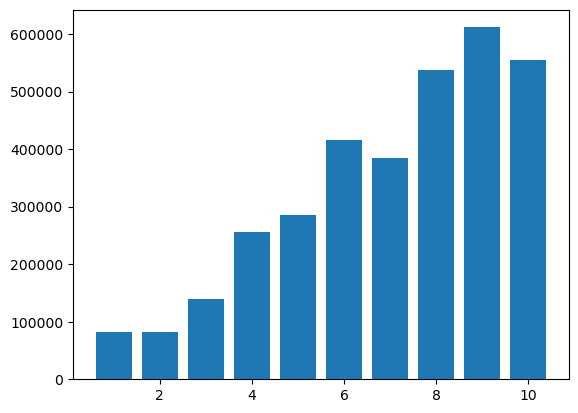

In [41]:
plt.bar(train['Overall Qual'], train['SalePrice']);

In [42]:
train['MS Zoning'].value_counts()

RL         1598
RM          316
FV          101
C (all)      19
RH           14
A (agr)       2
I (all)       1
Name: MS Zoning, dtype: int64

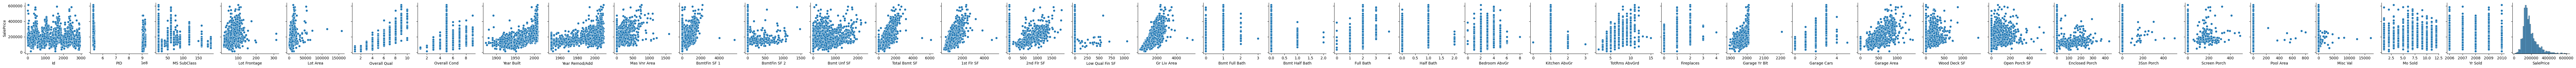

In [43]:
sns.pairplot(train, y_vars=['SalePrice']);